[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-95c75a96a73b>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-2-95c75a96a73b>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


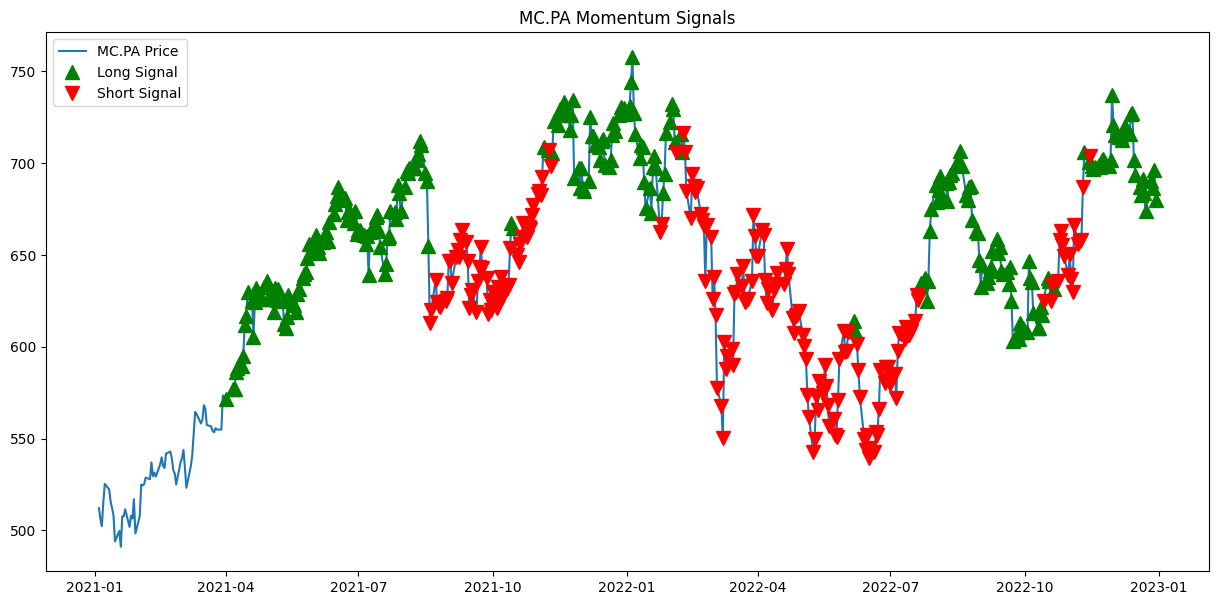

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-95c75a96a73b>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-2-95c75a96a73b>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


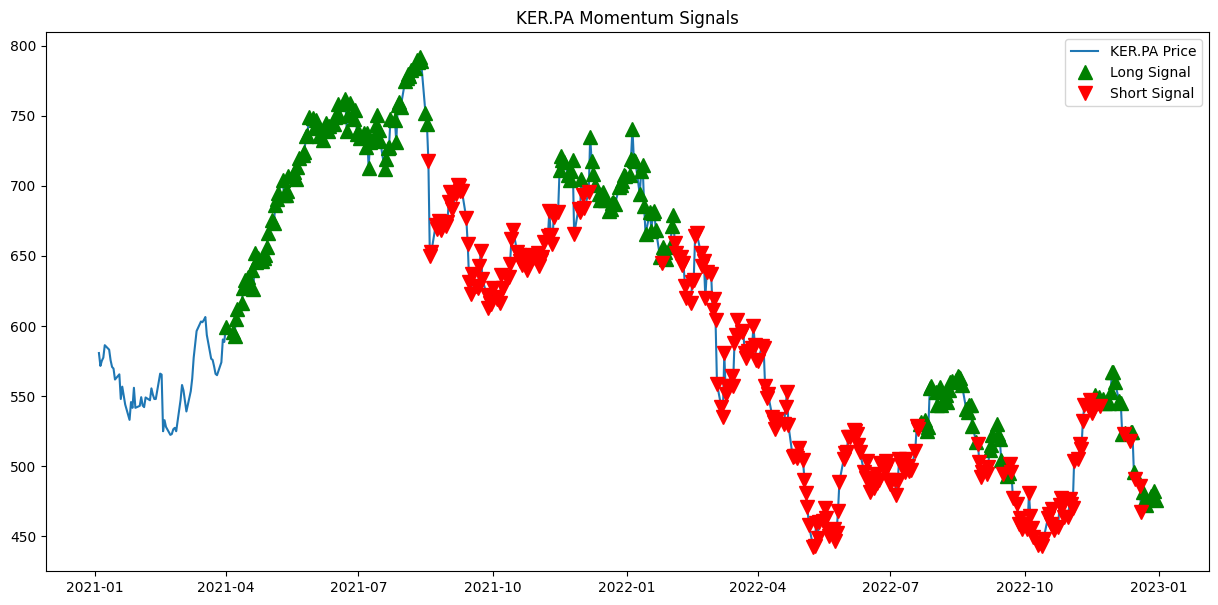

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-95c75a96a73b>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-2-95c75a96a73b>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


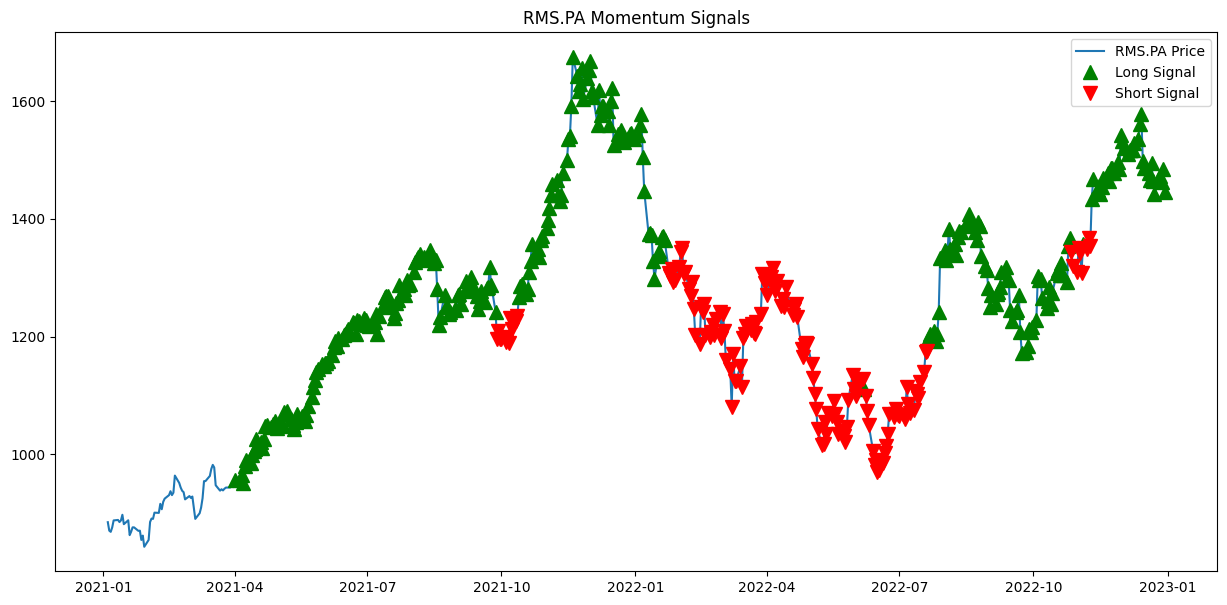

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-95c75a96a73b>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-2-95c75a96a73b>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


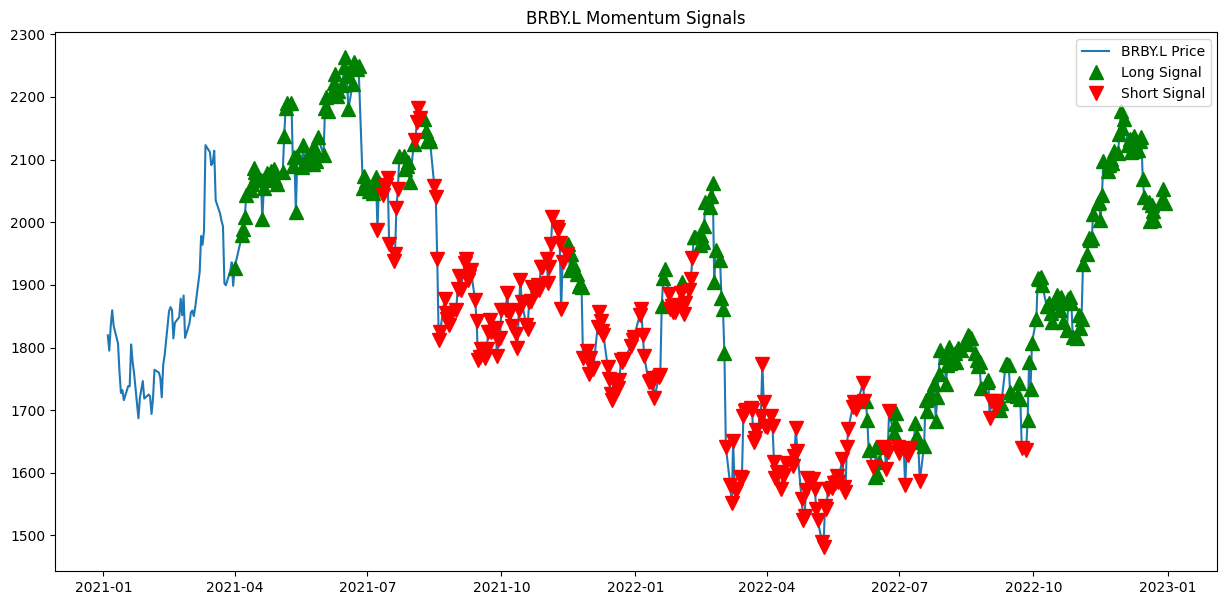

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-95c75a96a73b>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-2-95c75a96a73b>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


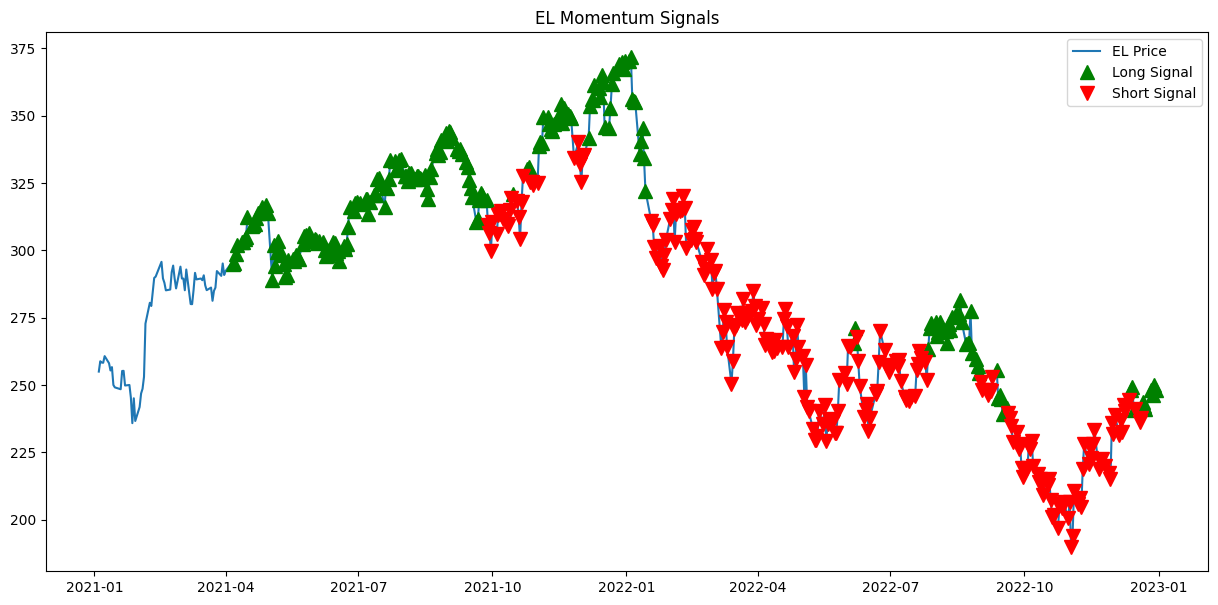

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-95c75a96a73b>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-2-95c75a96a73b>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


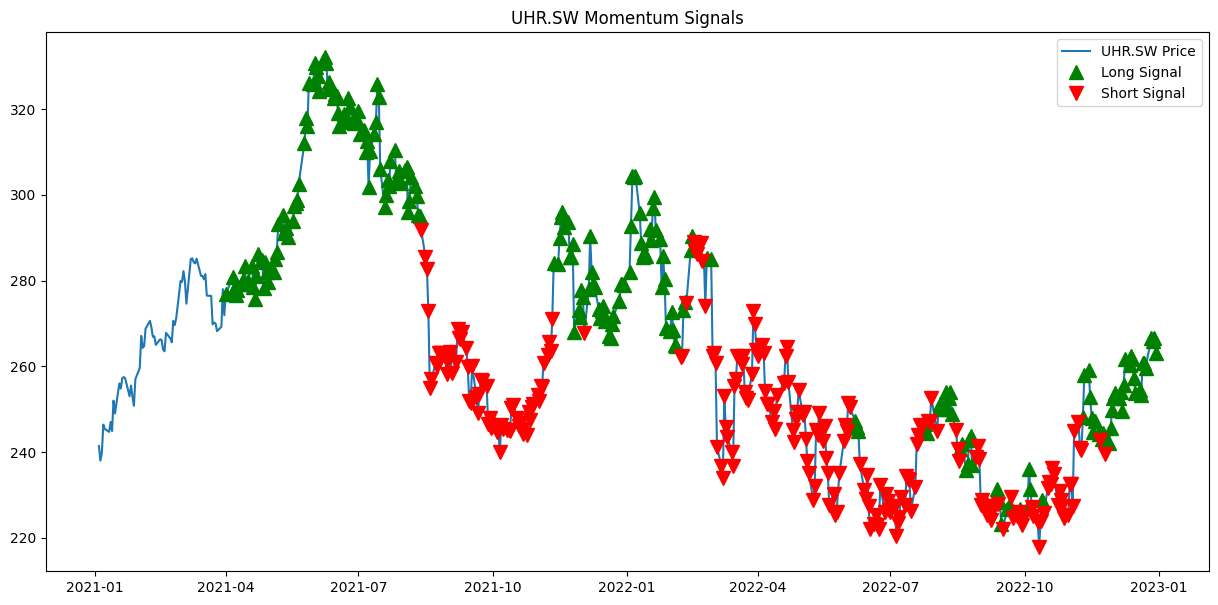

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-95c75a96a73b>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-2-95c75a96a73b>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


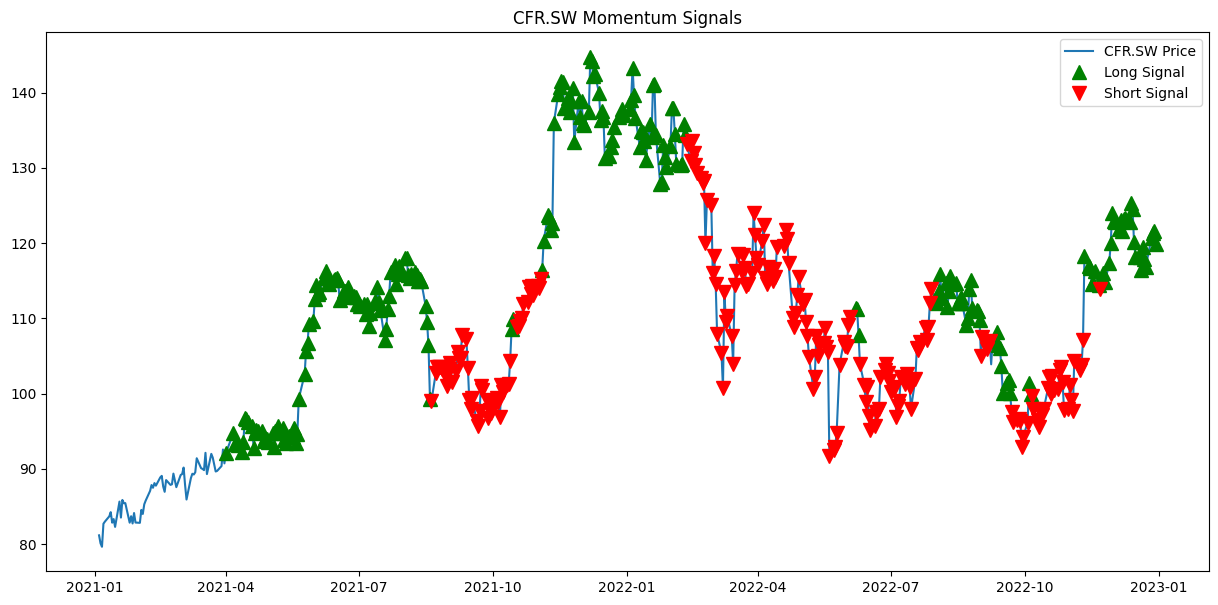

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-95c75a96a73b>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-2-95c75a96a73b>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


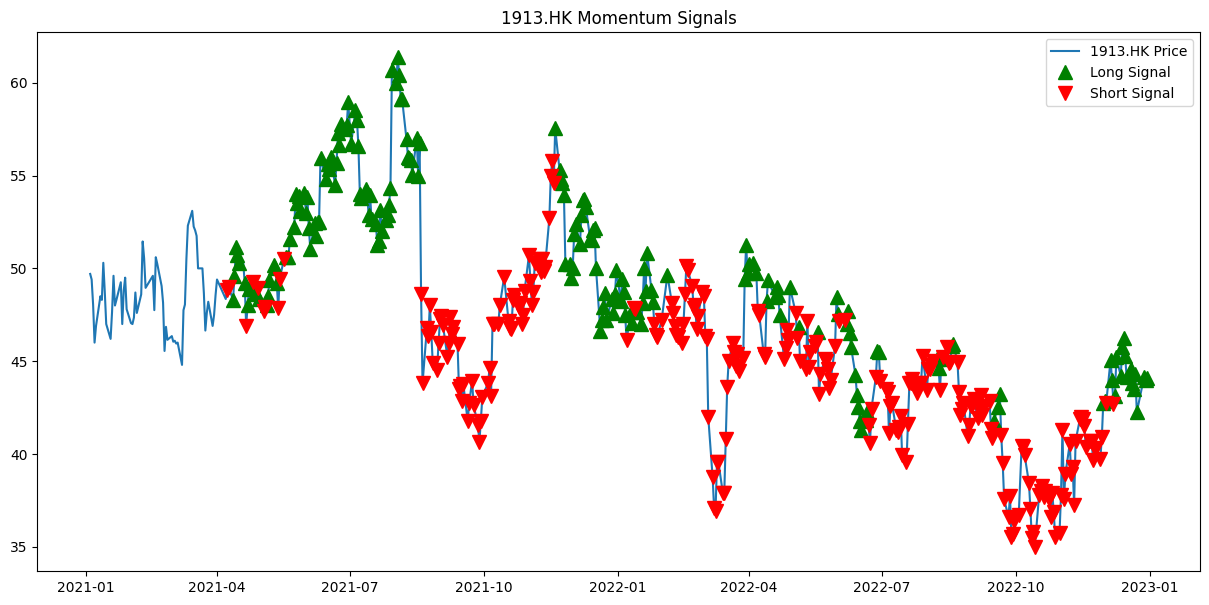

[*********************100%%**********************]  1 of 1 completed
<ipython-input-2-95c75a96a73b>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-2-95c75a96a73b>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


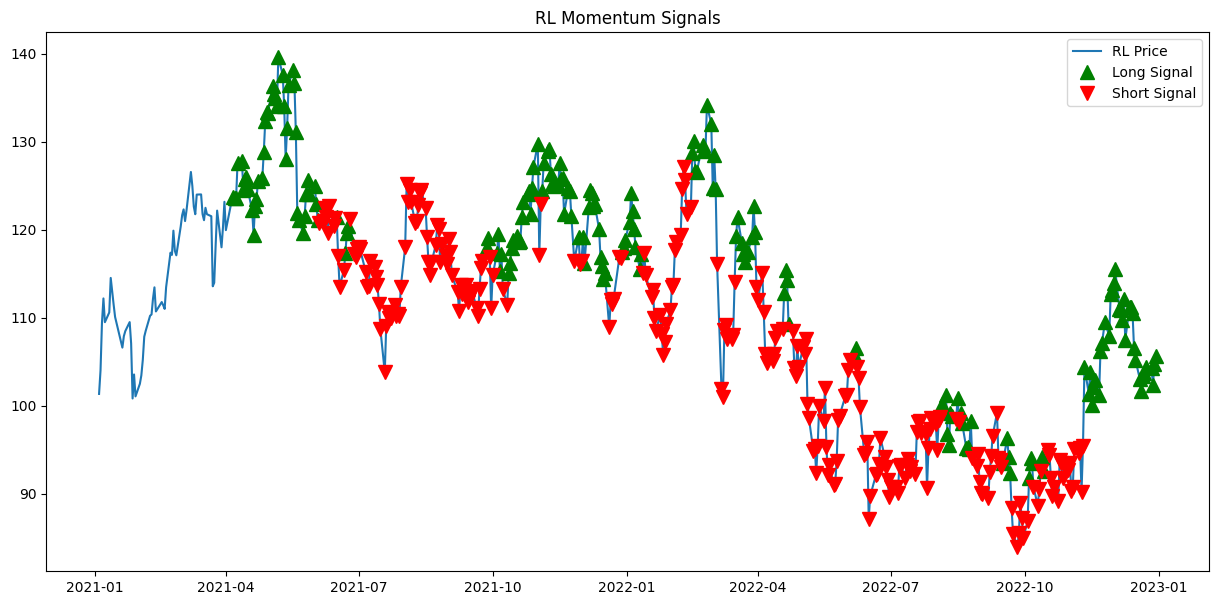

Asset Ranking (Top: Most Longs compared to Shorts):
RMS.PA: 2.147783251231527
MC.PA: 1.4389312977099236
CFR.SW: 1.1481481481481481
BRBY.L: 1.0746753246753247
UHR.SW: 0.9570552147239264
EL: 0.9329268292682927
KER.PA: 0.846820809248555
1913.HK: 0.7430939226519337
RL: 0.7228260869565217


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate momentum (Si,t-Si,t-h)/(Si,t-h) return during h look_back periode
def calculate_momentum(prices, lookback_period):
    momentum = prices.pct_change(lookback_period)
    return momentum

# Constants
LOOKBACK_PERIOD = 63  # Approximately 3 months of trading days for 2 years of période
REBALANCE_FREQ = '1D'  # Daily rebalancing

def momentum_strategy(ticker, start_date, end_date):
    # download data and convcert into dataframe
    data = (yf.download(ticker, start=start_date, end=end_date)['Close']).to_frame(name=ticker)

    # momentum calculation
    momentum_scores = calculate_momentum(data, LOOKBACK_PERIOD)

    # Initialisation of long and short signals
    long_signals = pd.DataFrame(False, index=data.index, columns=[ticker])
    short_signals = pd.DataFrame(False, index=data.index, columns=[ticker])

    # Matching momentum scores index and long ans short signals index
    aligned_momentum_scores = momentum_scores.reindex(data.index)

    for date in aligned_momentum_scores.index:
        today_momentum = aligned_momentum_scores.at[date, ticker]
        long_signals.at[date, ticker] = today_momentum > 0
        short_signals.at[date, ticker] = today_momentum <= 0

    # Filter signals daily frequency and fill daily signals :
    # ex : if we have a long signal, we fill all daily signals by long until the next short signal
    long_signals = long_signals.resample(REBALANCE_FREQ).ffill().astype(bool)
    short_signals = short_signals.resample(REBALANCE_FREQ).ffill().astype(bool)

    # Plotting the signals
    plt.figure(figsize=(15, 7))
    plt.plot(data, label=f'{ticker} Price')
    plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
    plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')
    plt.title(f'{ticker} Momentum Signals')
    plt.legend()
    plt.show()

    return long_signals, short_signals, data


def rank_asset(ticker, long_signals, short_signals, start_date, end_date):
    # Count the number of long and short signals within the period
    nb_long_signals = long_signals.loc[start_date:end_date, ticker].sum()
    nb_short_signals = short_signals.loc[start_date:end_date, ticker].sum()

    # Avoid division by zero
    if nb_short_signals == 0:
        ratio = float('inf')  # Assign infinity if no short signals
    else:
        ratio = nb_long_signals / nb_short_signals

    return ratio

# Tickers for luxury brands
luxury_tickers = [
    'MC.PA',  # LVMH
    'KER.PA',  # Kering
    'RMS.PA',  # Hermes
    'BRBY.L',  # Burberry
    'EL',  # Estee Lauder
    'UHR.SW',  # Swatch Group
    'CFR.SW',  # Richemont
    '1913.HK',  # Prada
    'RL',  # Ralph Lauren
]

# Testing the ranking function for each asset
start_date = '2021-01-01'
end_date = '2023-01-01'

asset_rankings = {}
for ticker in luxury_tickers:
    longs, shorts, _ = momentum_strategy(ticker, start_date, end_date)
    asset_rankings[ticker] = rank_asset(ticker, longs, shorts, start_date, end_date)

# Sorting the rankings
sorted_rankings = sorted(asset_rankings.items(), key=lambda x: x[1], reverse=True)

# Display the ranked assets
print("Asset Ranking (Top: Most Longs compared to Shorts):")
for ticker, ratio in sorted_rankings:
    print(f"{ticker}: {ratio}")


[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-f38a143d80b6>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-1-f38a143d80b6>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


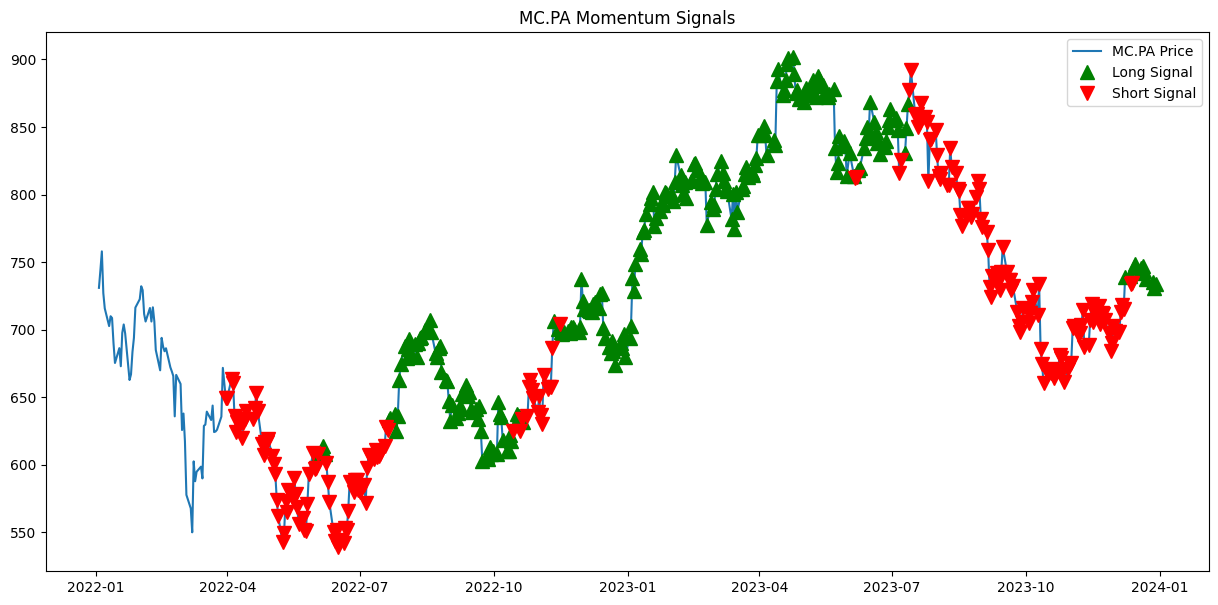

[*********************100%%**********************]  1 of 1 completed

Total Return Rate: 22.25 %
Entry Dates are: [Timestamp('2022-06-06 00:00:00'), Timestamp('2022-07-25 00:00:00'), Timestamp('2022-11-14 00:00:00'), Timestamp('2023-12-11 00:00:00')]
Exit Dates are: [Timestamp('2022-06-10 00:00:00'), Timestamp('2022-10-26 00:00:00'), Timestamp('2023-07-17 00:00:00'), Timestamp('2023-12-29 00:00:00')]



<ipython-input-1-f38a143d80b6>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-1-f38a143d80b6>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


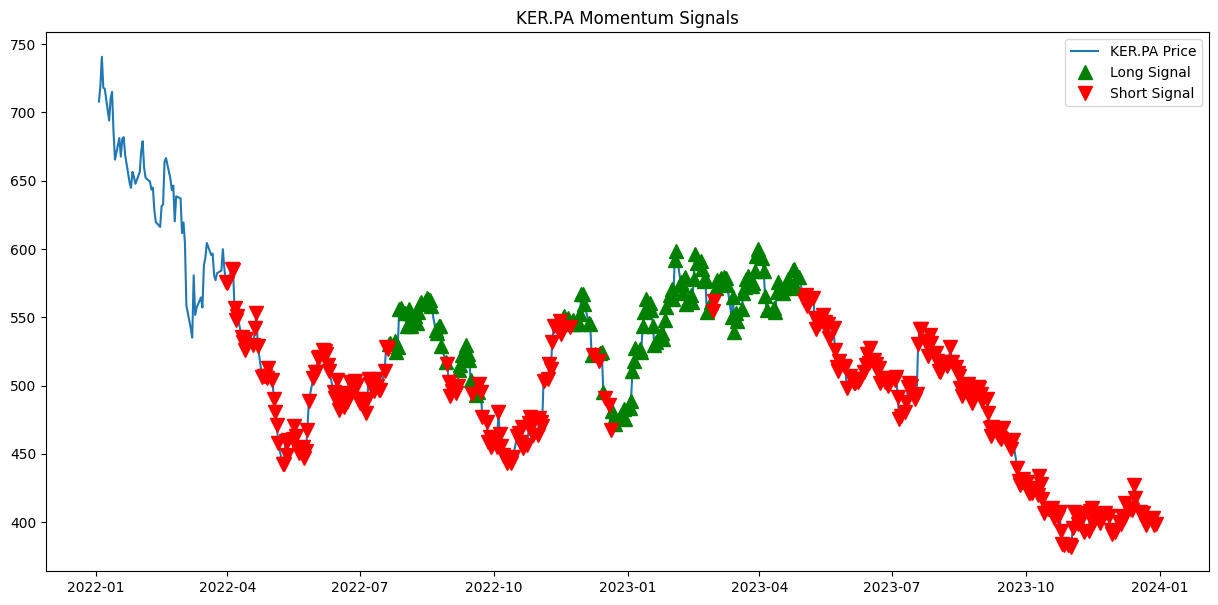

[*********************100%%**********************]  1 of 1 completed

Total Return Rate: -11.82 %
Entry Dates are: [Timestamp('2022-07-25 00:00:00'), Timestamp('2022-09-09 00:00:00'), Timestamp('2022-11-21 00:00:00'), Timestamp('2022-12-23 00:00:00')]
Exit Dates are: [Timestamp('2022-09-01 00:00:00'), Timestamp('2022-09-23 00:00:00'), Timestamp('2022-12-19 00:00:00'), Timestamp('2023-05-04 00:00:00')]



<ipython-input-1-f38a143d80b6>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-1-f38a143d80b6>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


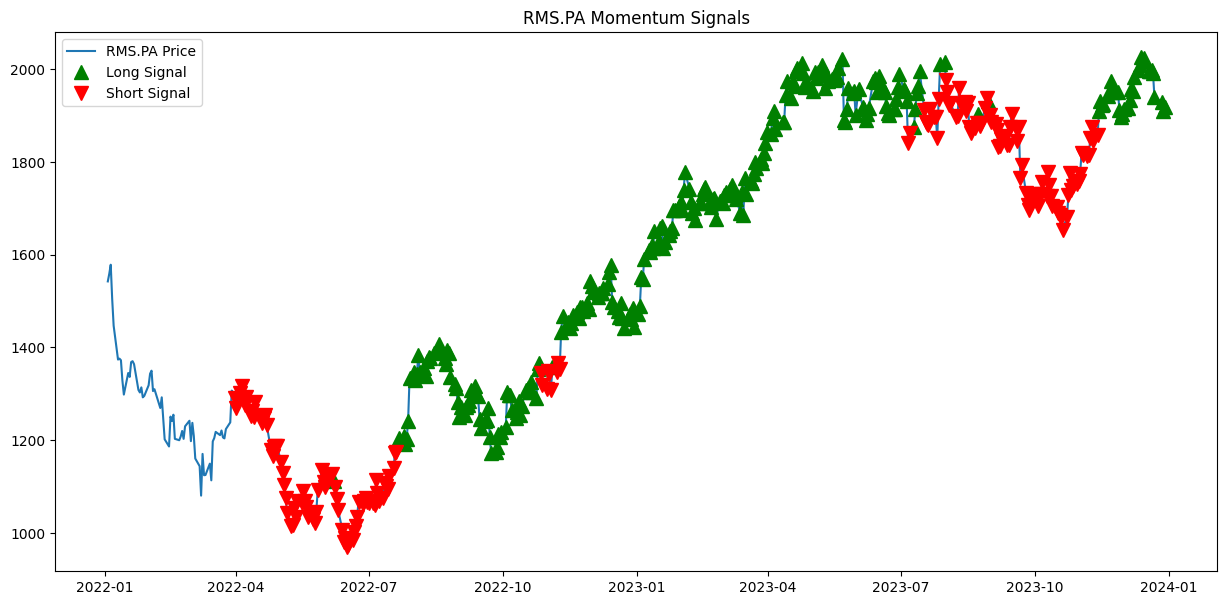

[*********************100%%**********************]  1 of 1 completed

Total Return Rate: 36.20 %
Entry Dates are: [Timestamp('2022-07-25 00:00:00'), Timestamp('2022-11-14 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-11-16 00:00:00')]
Exit Dates are: [Timestamp('2022-10-31 00:00:00'), Timestamp('2023-07-19 00:00:00'), Timestamp('2023-08-03 00:00:00'), Timestamp('2023-12-29 00:00:00')]



<ipython-input-1-f38a143d80b6>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-1-f38a143d80b6>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


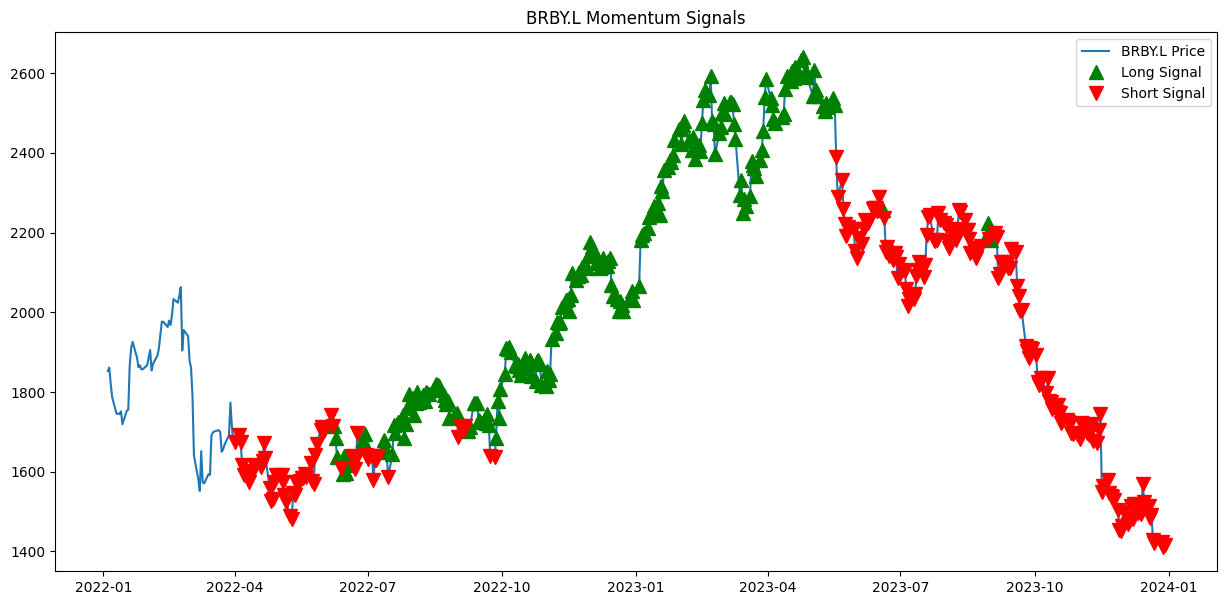

[*********************100%%**********************]  1 of 1 completed

Total Return Rate: 29.40 %
Entry Dates are: [Timestamp('2022-06-10 00:00:00'), Timestamp('2022-06-29 00:00:00'), Timestamp('2022-07-13 00:00:00'), Timestamp('2022-09-09 00:00:00'), Timestamp('2022-09-29 00:00:00')]
Exit Dates are: [Timestamp('2022-06-22 00:00:00'), Timestamp('2022-07-04 00:00:00'), Timestamp('2022-09-05 00:00:00'), Timestamp('2022-09-26 00:00:00'), Timestamp('2023-05-22 00:00:00')]



<ipython-input-1-f38a143d80b6>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-1-f38a143d80b6>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


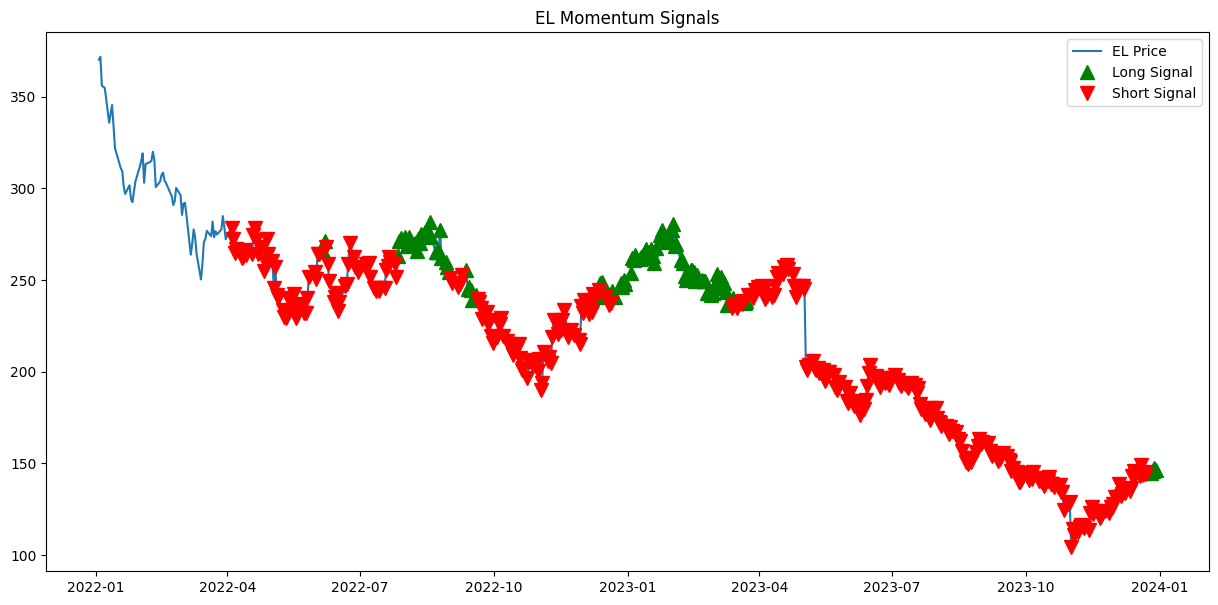

[*********************100%%**********************]  1 of 1 completed

Total Return Rate: -18.42 %
Entry Dates are: [Timestamp('2022-07-29 00:00:00'), Timestamp('2022-09-14 00:00:00'), Timestamp('2022-12-15 00:00:00'), Timestamp('2022-12-23 00:00:00'), Timestamp('2023-12-28 00:00:00')]
Exit Dates are: [Timestamp('2022-09-06 00:00:00'), Timestamp('2022-09-22 00:00:00'), Timestamp('2022-12-19 00:00:00'), Timestamp('2023-03-17 00:00:00'), Timestamp('2023-12-29 00:00:00')]



<ipython-input-1-f38a143d80b6>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-1-f38a143d80b6>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


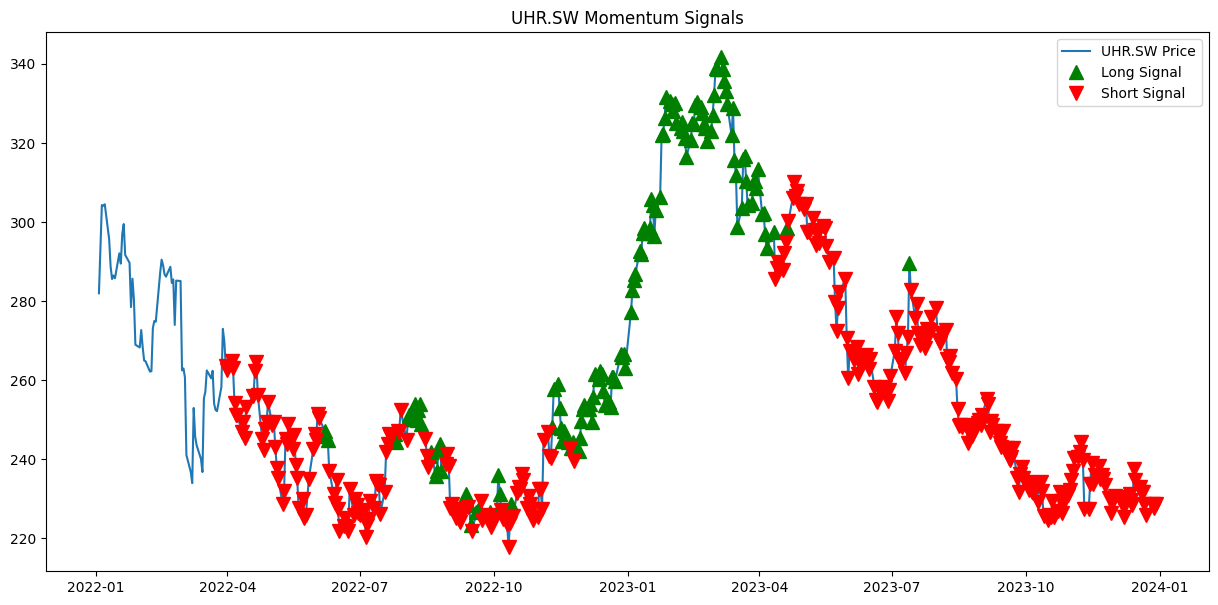

[*********************100%%**********************]  1 of 1 completed

Total Return Rate: -1.14 %
Entry Dates are: [Timestamp('2022-06-09 00:00:00'), Timestamp('2022-08-05 00:00:00'), Timestamp('2022-08-22 00:00:00'), Timestamp('2022-09-21 00:00:00'), Timestamp('2022-10-05 00:00:00'), Timestamp('2022-11-14 00:00:00')]
Exit Dates are: [Timestamp('2022-06-13 00:00:00'), Timestamp('2022-08-17 00:00:00'), Timestamp('2022-08-31 00:00:00'), Timestamp('2022-09-26 00:00:00'), Timestamp('2022-10-10 00:00:00'), Timestamp('2023-04-14 00:00:00')]



<ipython-input-1-f38a143d80b6>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-1-f38a143d80b6>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


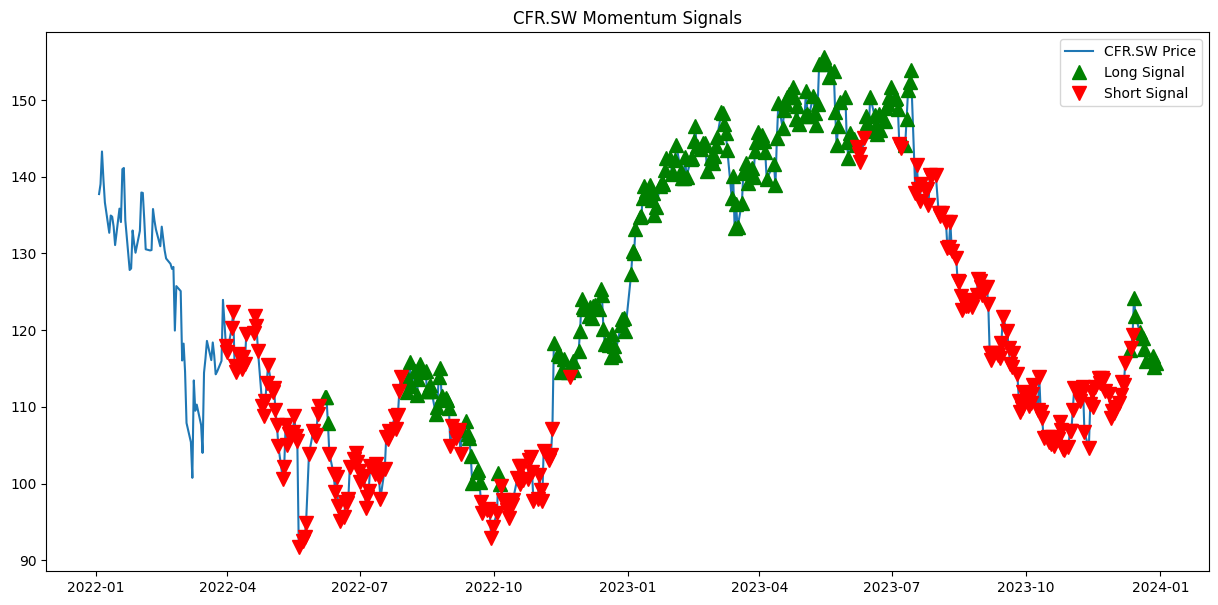

[*********************100%%**********************]  1 of 1 completed

Total Return Rate: -13.76 %
Entry Dates are: [Timestamp('2022-06-09 00:00:00'), Timestamp('2022-08-04 00:00:00'), Timestamp('2022-09-12 00:00:00'), Timestamp('2022-11-14 00:00:00'), Timestamp('2023-06-15 00:00:00'), Timestamp('2023-12-18 00:00:00')]
Exit Dates are: [Timestamp('2022-06-13 00:00:00'), Timestamp('2022-09-05 00:00:00'), Timestamp('2022-09-26 00:00:00'), Timestamp('2023-06-09 00:00:00'), Timestamp('2023-07-19 00:00:00'), Timestamp('2023-12-29 00:00:00')]



<ipython-input-1-f38a143d80b6>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-1-f38a143d80b6>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


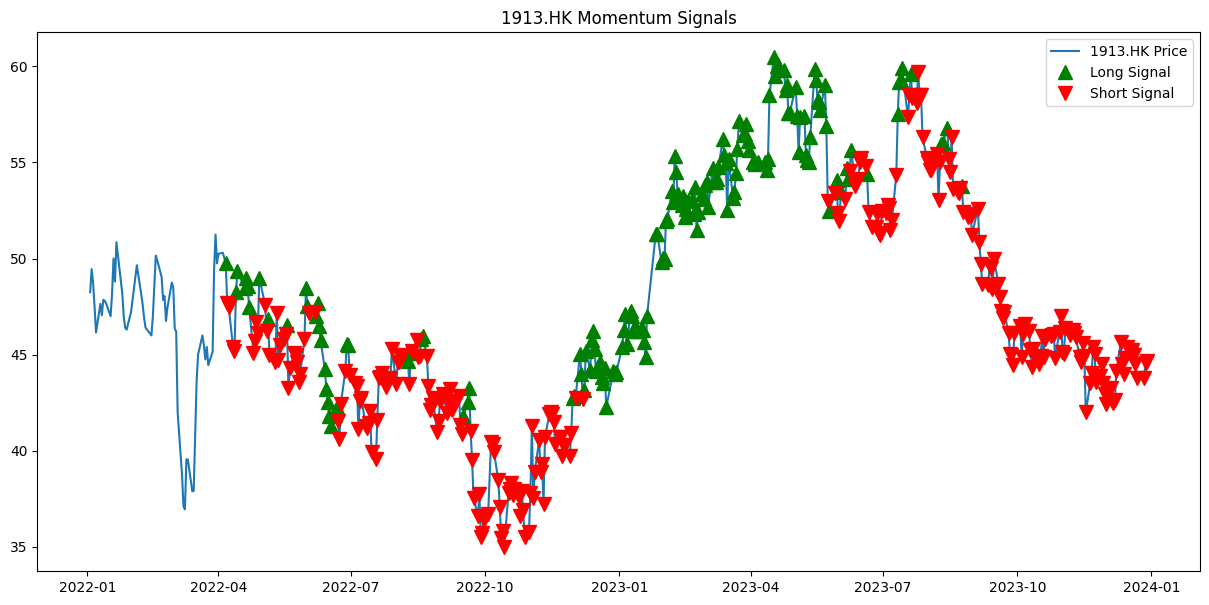

[*********************100%%**********************]  1 of 1 completed

Total Return Rate: -5.16 %
Entry Dates are: [Timestamp('2022-04-19 00:00:00'), Timestamp('2022-06-09 00:00:00'), Timestamp('2022-09-19 00:00:00'), Timestamp('2022-12-12 00:00:00'), Timestamp('2023-07-13 00:00:00'), Timestamp('2023-08-14 00:00:00')]
Exit Dates are: [Timestamp('2022-04-27 00:00:00'), Timestamp('2022-06-24 00:00:00'), Timestamp('2022-09-23 00:00:00'), Timestamp('2023-06-14 00:00:00'), Timestamp('2023-07-24 00:00:00'), Timestamp('2023-08-17 00:00:00')]



<ipython-input-1-f38a143d80b6>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-1-f38a143d80b6>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


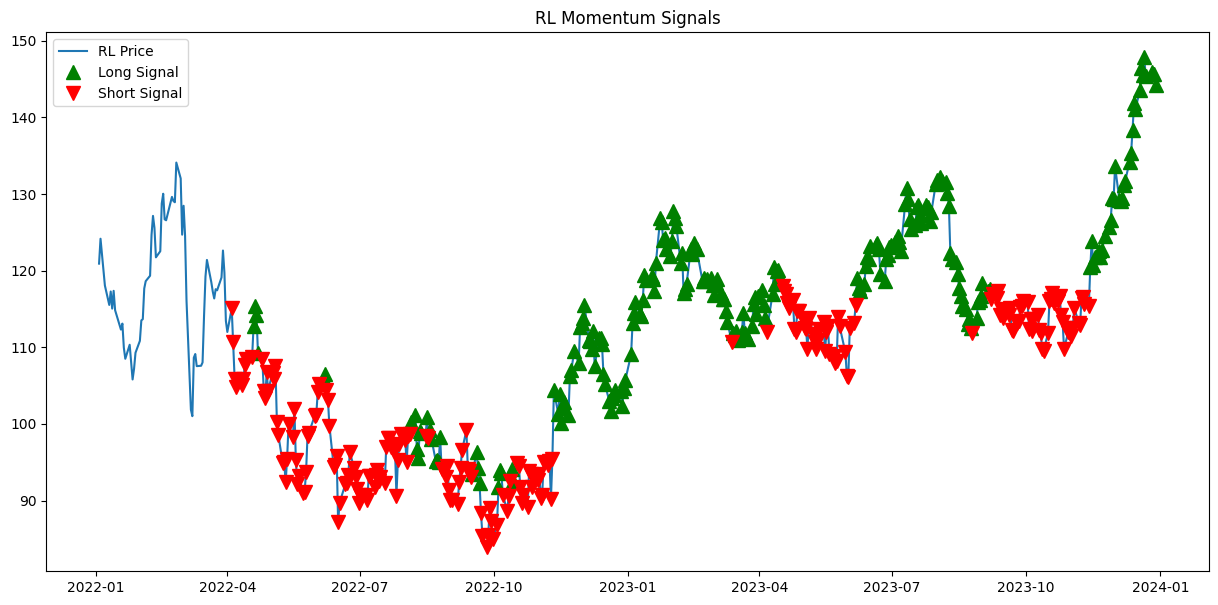

[*********************100%%**********************]  1 of 1 completed

Total Return Rate: 1.89 %
Entry Dates are: [Timestamp('2022-04-21 00:00:00'), Timestamp('2022-08-08 00:00:00'), Timestamp('2022-09-19 00:00:00'), Timestamp('2022-10-06 00:00:00'), Timestamp('2022-11-14 00:00:00'), Timestamp('2023-06-09 00:00:00'), Timestamp('2023-11-16 00:00:00')]
Exit Dates are: [Timestamp('2022-04-27 00:00:00'), Timestamp('2022-08-29 00:00:00'), Timestamp('2022-09-26 00:00:00'), Timestamp('2022-10-10 00:00:00'), Timestamp('2023-04-19 00:00:00'), Timestamp('2023-09-11 00:00:00'), Timestamp('2023-12-29 00:00:00')]



<ipython-input-1-f38a143d80b6>:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[long_signals[ticker]], '^', color='g', markersize=10, label='Long Signal')
<ipython-input-1-f38a143d80b6>:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.plot(data[short_signals[ticker]], 'v', color='r', markersize=10, label='Short Signal')


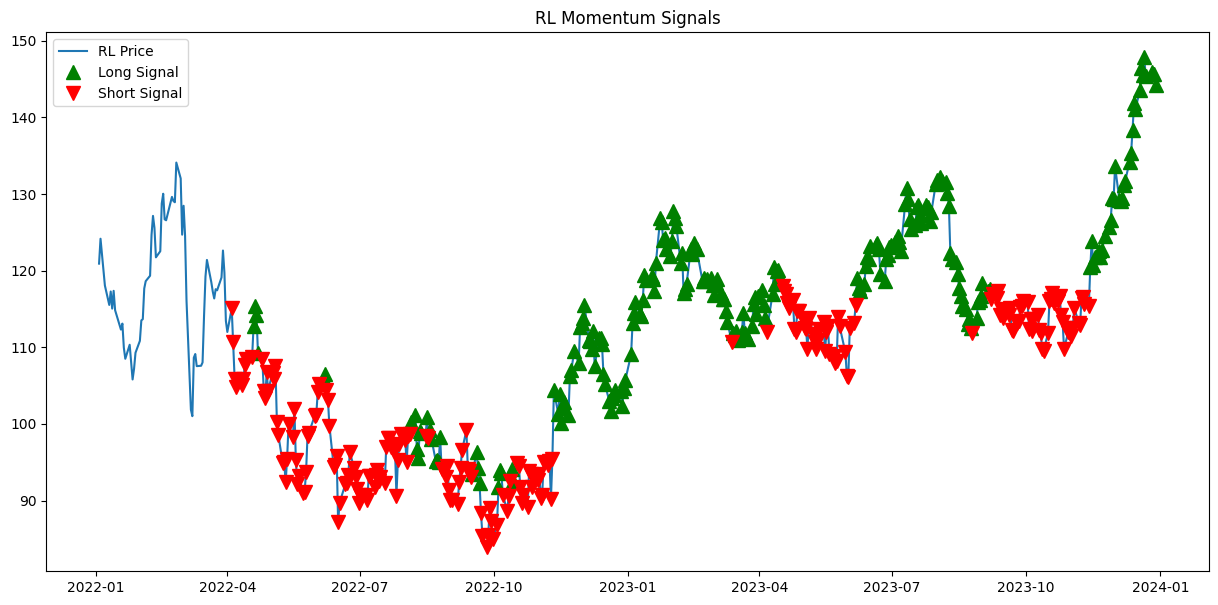

(1.8907528651135177,
 [Timestamp('2022-04-21 00:00:00'),
  Timestamp('2022-08-08 00:00:00'),
  Timestamp('2022-09-19 00:00:00'),
  Timestamp('2022-10-06 00:00:00'),
  Timestamp('2022-11-14 00:00:00'),
  Timestamp('2023-06-09 00:00:00'),
  Timestamp('2023-11-16 00:00:00')],
 [Timestamp('2022-04-27 00:00:00'),
  Timestamp('2022-08-29 00:00:00'),
  Timestamp('2022-09-26 00:00:00'),
  Timestamp('2022-10-10 00:00:00'),
  Timestamp('2023-04-19 00:00:00'),
  Timestamp('2023-09-11 00:00:00'),
  Timestamp('2023-12-29 00:00:00')],
 0     114.239998
 1     103.389999
 2     101.160004
 3      93.129997
 4      96.269997
 5      83.959999
 6      93.529999
 7      88.639999
 8     101.339996
 9     116.919998
 10    117.330002
 11    116.489998
 12    120.699997
 13    144.199997
 dtype: float64)

In [ ]:
def execution_momentum_strategy(ticker, start_date, end_date):
    long_signals, short_signals, data = momentum_strategy(ticker, start_date, end_date)
    in_position = False
    entry_price = 0
    total_return = 0
    entry_date = []
    exit_date = []
    entry_price_list = []
    strategy_retrace_price=[]

    # Adjust end_date to the closest available date in data if it's not present
    end_date = pd.to_datetime(end_date)
    if end_date not in data.index:
        end_date = data.index[data.index < end_date][-1]

    # Create rolling series for signals
    rolling_long_signals = long_signals[ticker].rolling(window=3).sum()
    rolling_short_signals = short_signals[ticker].rolling(window=3).sum()

    for date in data.index:
        if not in_position and rolling_long_signals.get(date, 0) == 3:
            entry_price = data.at[date, ticker]
            entry_price_list.append(entry_price)
            strategy_retrace_price.append(entry_price)
            entry_date.append(date)
            in_position = True
        elif in_position and (rolling_short_signals.get(date, 0) == 3 or date == end_date):
            exit_price = data.at[date, ticker]
            total_return += (exit_price - entry_price)
            exit_date.append(date)
            strategy_retrace_price.append(exit_price)
            in_position = False

    total_return_percent = ((total_return / entry_price_list[0]) * 100) if entry_price_list else 0
    strategy_retrace_price = pd.Series(strategy_retrace_price)

    return total_return_percent, entry_date, exit_date, strategy_retrace_price

def momentun_strategy_traing_final(tickers, start_date, end_date):
    for ticker in luxury_tickers:
        total_return,entry_date,exit_date, strategy_retrace_price= execution_momentum_strategy(ticker, start_date, end_date)
        print(f"Total Return Rate: {total_return:.2f} %")
        print(f"Entry Dates are: {entry_date}")
        print(f"Exit Dates are: {exit_date}")

    return execution_momentum_strategy(ticker, start_date, end_date)

momentun_strategy_traing_final(luxury_tickers,'2022-01-01', '2023-12-31')



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np


# Compute Compound Annual Growth Rate (CAGR)
def compute_CAGR(prices, multiplicator=252):
    n = len(prices)
    cagr = (prices.iloc[-1] / prices.iloc[0]) ** (multiplicator / (n - 1)) - 1
    return cagr

# Compute Volatility
def compute_vol(prices, multiplicator=252):
    returns = prices.pct_change().dropna()
    mu = returns.mean()
    sigma_daily = np.sqrt(np.sum((returns - mu) ** 2) / (len(returns) - 1))
    sigma = np.sqrt(multiplicator) * sigma_daily
    return sigma

# Compute Drawdown and MaxDrawdown
def compute_dd(prices):
    drawdown = prices / prices.cummax() - 1
    return drawdown

# Compute Sharpe Ratio
def compute_sharpe_ratio(prices, ret_without_risk=0.027, multiplicator=252):
    cagr = compute_CAGR(prices, multiplicator)
    vol = compute_vol(prices, multiplicator)
    sharpe_ratio = (cagr - ret_without_risk) / vol
    return sharpe_ratio

def stock_analysis(ticker):
    stock_data = yf.download(ticker, start='2010-01-01')
    prices = stock_data['Close']

    cagr = compute_CAGR(prices)
    print(f'CAGR of {ticker} is: {round(cagr * 100, 2)}%')

    vol = compute_vol(prices)
    print(f'Volatility of {ticker} is: {round(vol * 100, 2)}%')

    dd = compute_dd(prices)
    mdd = dd.min()
    print(f'MaxDrawdown of {ticker} is: {round(mdd * 100, 2)}%')

    risk_free_rate = 0.027
    sr = compute_sharpe_ratio(prices, risk_free_rate)
    print(f'Sharpe Ratio of {ticker} is: {round(sr, 2)}')

    # rolling
    subsets = {
        '2010-2015': prices['2010-01':'2015-12'],
        '2016-2020': prices['2016-01':'2020-12'],
        '2021-2023': prices['2021-01':'2023-12']
    }

    for period, subset in subsets.items():
        sr_subset = compute_sharpe_ratio(subset, risk_free_rate)
        print(f'Sharpe Ratio of {ticker} ({period}) = {round(sr_subset, 2)}')

In [ ]:
import pandas as pd
import numpy as np

# (Insérez ici vos fonctions compute_CAGR, compute_vol, compute_dd, compute_sharpe_ratio)

def global_strategy(tickers, start_date, end_date):
    results = []

    for ticker in tickers:
        total_return,entry_date,exit_date, strategy_retrace_price= execution_momentum_strategy(ticker, start_date, end_date)

        # Calculer les métriques pour chaque actif
        cagr = compute_CAGR(strategy_retrace_price, multiplicator=252)
        vol = compute_vol(strategy_retrace_price, multiplicator=252)
        dd = compute_dd(strategy_retrace_price).min()
        SP = compute_sharpe_ratio(strategy_retrace_price, ret_without_risk=0.027, multiplicator=252)

        # Ajouter les résultats dans une liste
        results.append([ticker, cagr, vol, dd, SP])
        print(strategy_retrace_price)

    # Créer un DataFrame à partir des résultats
    results_df = pd.DataFrame(results, columns=['Ticker', 'CAGR', 'Volatility', 'Max Drawdown', 'Sharp Ratio'])
    return results_df

# Exemple d'utilisation
luxury_tickers = [
    'MC.PA',  # LVMH
    'KER.PA',  # Kering
    'RMS.PA',  # Hermes
    'BRBY.L',  # Burberry
    'EL',  # Estee Lauder
    'UHR.SW',  # Swatch Group
    'CFR.SW',  # Richemont
    '1913.HK',  # Prada
    'RL',  # Ralph Lauren
]
summary_table = global_strategy(luxury_tickers, '2021-01-01', '2023-01-01')
print(summary_table)



In [ ]:
def stock_analysis(ticker):
    stock_data = yf.download(ticker, start='2010-01-01')
    prices = stock_data['Close']

    cagr = compute_CAGR(prices)
    print(f'CAGR of {ticker} is: {round(cagr * 100, 2)}%')

    vol = compute_vol(prices)
    print(f'Volatility of {ticker} is: {round(vol * 100, 2)}%')

    dd = compute_dd(prices)
    mdd = dd.min()
    print(f'MaxDrawdown of {ticker} is: {round(mdd * 100, 2)}%')

    risk_free_rate = 0.027
    sr = compute_sharpe_ratio(prices, risk_free_rate)
    print(f'Sharpe Ratio of {ticker} is: {round(sr, 2)}')

    # rolling
    subsets = {
        '2010-2015': prices['2010-01':'2015-12'],
        '2016-2020': prices['2016-01':'2020-12'],
        '2021-2023': prices['2021-01':'2023-01']
    }

    for period, subset in subsets.items():
        sr_subset = compute_sharpe_ratio(subset, risk_free_rate)
        print(f'Sharpe Ratio of {ticker} ({period}) = {round(sr_subset, 2)}')

stock_analysis('MC.PA')

[*********************100%%**********************]  1 of 1 completed

CAGR of MC.PA is: 16.07%
Volatility of MC.PA is: 27.11%
MaxDrawdown of MC.PA is: -34.42%
Sharpe Ratio of MC.PA is: 0.49
Sharpe Ratio of MC.PA (2010-2015) = 0.3
Sharpe Ratio of MC.PA (2016-2020) = 1.01
Sharpe Ratio of MC.PA (2021-2023) = 0.71


In [ ]:
import yfinance as yf
import pandas as pd

# Define a list of tickers representing different sectors using ETFs
sectors = {
    'Technology': 'VGT',          # Vanguard Information Technology ETF
    'Healthcare': 'VHT',          # Vanguard Health Care ETF
    'Finance': 'VFH',             # Vanguard Financials ETF
    'Energy': 'VDE',              # Vanguard Energy ETF
    'Consumer Discretionary': 'VCR',  # Vanguard Consumer Discretionary ETF
    'Consumer Staples': 'VDC',    # Vanguard Consumer Staples ETF
    'Industrial': 'VIS',          # Vanguard Industrials ETF
    'Materials': 'VAW',           # Vanguard Materials ETF
    'Real Estate': 'VNQ',         # Vanguard Real Estate ETF
    'Utilities': 'VPU'            # Vanguard Utilities ETF
}

# Initialize a DataFrame to store our data
sector_data = pd.DataFrame()

# Fetch historical data for each sector from 2022 to 2024
for sector, ticker in sectors.items():
    stock = yf.download(ticker, start="2022-01-01", end="2024-01-01")
    if not stock.empty:
        # Calculate annual returns
        for year in [2022, 2023]:
            yearly_data = stock.loc[f"{year}-01-01":f"{year}-12-31"]
            if not yearly_data.empty:
                annual_return = (yearly_data['Close'].iloc[-1] - yearly_data['Close'].iloc[0]) / yearly_data['Close'].iloc[0] * 100
                sector_data.at[sector, f'{year} Return (%)'] = annual_return

# Calculate partial return for 2024
for sector, ticker in sectors.items():
    stock = yf.download(ticker, start="2024-01-01")
    if not stock.empty:
        partial_return_2024 = (stock['Close'].iloc[-1] - stock['Close'].iloc[0]) / stock['Close'].iloc[0] * 100
        sector_data.at[sector, '2024 Partial Return (%)'] = partial_return_2024

# Calculate average return across the years
sector_data['Average Return (%)'] = sector_data.mean(axis=1)

# Sort sectors based on average return
sector_rankings = sector_data.sort_values('Average Return (%)', ascending=False)

print(sector_rankings[['Average Return (%)']])


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

                        Average Return (%)
Energy                           15.567692
Technology                        9.386533
Industrial                        3.433406
Consumer Discretionary            0.529311
Finance                          -1.346573
Healthcare                       -1.512330
Materials                        -1.600290
Consumer Staples                 -1.795961
Utilities                        -5.645986
Real Estate                      -8.496507


In [ ]:
# import numpy as np
# import pandas as pd
# from scipy.optimize import minimize

# def allocation(investment_amount, sector_returns, risk_free_rate=0.02, risk_free_allocation=0.10, min_sector_allocation=0.01):
#     # Convert sector returns to DataFrame
#     returns_df = pd.DataFrame(list(sector_returns.items()), columns=['Sector', 'Expected Return'])
#     expected_returns = returns_df['Expected Return'].values / 100  # Convert to proportion

#     num_sectors = len(sector_returns)
#     init_guess = num_sectors * [1. / num_sectors]  # Equal weighting

#     # Covariance matrix - Assuming identity for simplification
#     cov_matrix = np.identity(num_sectors)

#     # Optimization objective function (Sharpe ratio)
#     def objective(weights):
#         port_return = np.sum(weights * expected_returns)
#         port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
#         return -(port_return - risk_free_rate) / port_volatility

#     # Constraints and bounds
#     constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
#     bounds = tuple((min_sector_allocation, 1) for sector in range(num_sectors))

#     # Optimize
#     opts = minimize(objective, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)

#     if opts.success:
#         optimal_weights = opts.x
#         adjusted_weights = optimal_weights * (1 - risk_free_allocation)
#         sector_investment = adjusted_weights * (investment_amount * (1 - risk_free_allocation))
#         risk_free_investment = investment_amount * risk_free_allocation
#         total_investment = np.append(sector_investment, risk_free_investment)

#         sectors_with_risk_free = returns_df['Sector'].tolist() + ['Risk-Free Asset']
#         investment_allocation = pd.DataFrame(list(zip(sectors_with_risk_free, total_investment)), columns=['Sector/Asset', 'Investment'])
#         investment_allocation['Investment'] = investment_allocation['Investment'].apply(lambda x: f'${x:,.2f}')
#         return investment_allocation
#     else:
#         return "Optimization failed: " + opts.message

# # Example usage
# # Given sector returns
# sector_returns = {
#     'Energy': 15.567692,
#     'Technology': 9.386533,
#     'Industrial': 3.433406,
#     'Consumer Discretionary': 0.529311,
#     'Finance': -1.346573,
#     'Healthcare': -1.512330,
#     'Materials': -1.600290,
#     'Consumer Staples': -1.795961,
#     'Utilities': -5.645986,
#     'Real Estate': -8.496507
# }
# investment_amount = 50000

# # Call the function
# print(allocation(investment_amount, sector_returns))




              Sector/Asset  Investment
0                   Energy  $23,371.54
1               Technology  $12,420.33
2               Industrial   $1,873.13
3   Consumer Discretionary     $405.00
4                  Finance     $405.00
5               Healthcare     $405.00
6                Materials     $405.00
7         Consumer Staples     $405.00
8                Utilities     $405.00
9              Real Estate     $405.00
10         Risk-Free Asset   $5,000.00


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def allocation(capital, sectors, risk_free_rate=0.02, risk_free_allocation=0.10, min_sector_allocation=0.01):
    # Fetch and calculate sector returns
    sector_data = pd.DataFrame()
    for sector, ticker in sectors.items():
        stock = yf.download(ticker, start="2022-01-01", end="2024-01-01")
        if not stock.empty:
            for year in [2022, 2023]:
                yearly_data = stock.loc[f"{year}-01-01":f"{year}-12-31"]
                if not yearly_data.empty:
                    annual_return = (yearly_data['Close'].iloc[-1] - yearly_data['Close'].iloc[0]) / yearly_data['Close'].iloc[0] * 100
                    sector_data.at[sector, f'{year} Return (%)'] = annual_return
            partial_return = (stock['Close'][-1] - stock['Close'][0]) / stock['Close'][0] * 100
            sector_data.at[sector, '2024 Partial Return (%)'] = partial_return

    # Calculate average return for each sector
    sector_data['Average Return (%)'] = sector_data.mean(axis=1)
    expected_returns = sector_data['Average Return (%)'].values / 100
    num_sectors = len(sectors)

    # Portfolio Optimization
    cov_matrix = np.identity(num_sectors)  # Simplified assumption
    init_guess = num_sectors * [1. / num_sectors]
    bounds = tuple((min_sector_allocation, 1) for _ in range(num_sectors))
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    def objective(weights):
        return -(np.sum(weights * expected_returns) - risk_free_rate) / np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    opt_results = minimize(objective, init_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if not opt_results.success:
        return "Optimization failed:", opt_results.message

    # Calculate investment allocation
    optimal_weights = opt_results.x
    adjusted_weights = optimal_weights * (1 - risk_free_allocation)
    sector_investment = adjusted_weights * (capital * (1 - risk_free_allocation))
    risk_free_investment = capital * risk_free_allocation
    total_investment = np.append(sector_investment, risk_free_investment)
    sectors_with_risk_free = list(sectors.keys()) + ['Risk-Free Asset']
    investment_allocation = pd.DataFrame({'Sector/Asset': sectors_with_risk_free, 'Investment': total_investment})
    investment_allocation['Investment'] = investment_allocation['Investment'].apply(lambda x: f'${x:,.2f}')

    return investment_allocation

# Example usage
sectors = {
    'Technology': 'VGT',          # Vanguard Information Technology ETF
    'Healthcare': 'VHT',          # Vanguard Health Care ETF
    'Finance': 'VFH',             # Vanguard Financials ETF
    'Energy': 'VDE',              # Vanguard Energy ETF
    'Consumer Discretionary': 'VCR',  # Vanguard Consumer Discretionary ETF
    'Consumer Staples': 'VDC',    # Vanguard Consumer Staples ETF
    'Industrial': 'VIS',          # Vanguard Industrials ETF
    'Materials': 'VAW',           # Vanguard Materials ETF
    'Real Estate': 'VNQ',         # Vanguard Real Estate ETF
    'Utilities': 'VPU'            # Vanguard Utilities ETF
}
investment_amount_example = 50000

# Call the function
print(allocation(investment_amount_example, sectors))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


              Sector/Asset  Investment
0               Technology   $5,896.52
1               Healthcare     $405.00
2                  Finance     $405.00
3                   Energy  $27,921.66
4   Consumer Discretionary     $405.00
5         Consumer Staples     $405.00
6               Industrial   $3,846.82
7                Materials     $405.00
8              Real Estate     $405.00
9                Utilities     $405.00
10         Risk-Free Asset   $5,000.00
